In [33]:
from seismic.monitor.dv import read_dv

infile = '../dv/resp_actually_removed_longtw_final_qc/autoComponents_1.0-2.0_wl3600_tw4.0-40.0__1b_mute_SW_pretmoothnosmoothd_srw/DV-CC-CC.NED-NED.EHZ-EHZ.npz'

dv = read_dv(infile)

In [45]:
from obspy import UTCDateTime
import numpy as np

corr_starts = np.array([UTCDateTime(cs) for cs in dv.stats.corr_start])

strange_noise = corr_starts[dv.corr > 0.75]

strange_noise_time = [sn.hour for sn in strange_noise]

Text(0, 0.5, 'N')

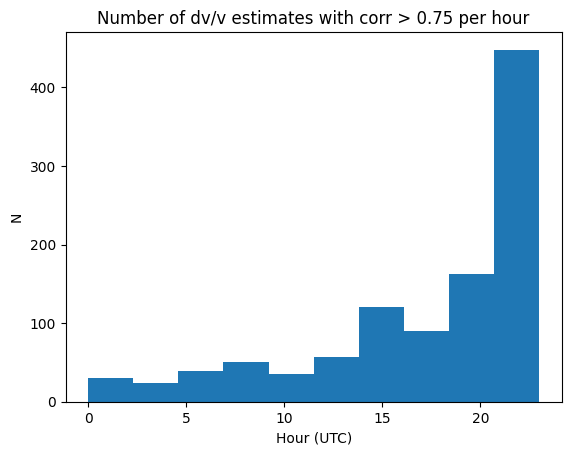

In [46]:
from matplotlib import pyplot as plt

plt.hist(strange_noise_time)
plt.title('Number of dv/v estimates with corr > 0.75 per hour')
plt.xlabel('Hour (UTC)')
plt.ylabel('N')

Text(0, 0.5, 'N')

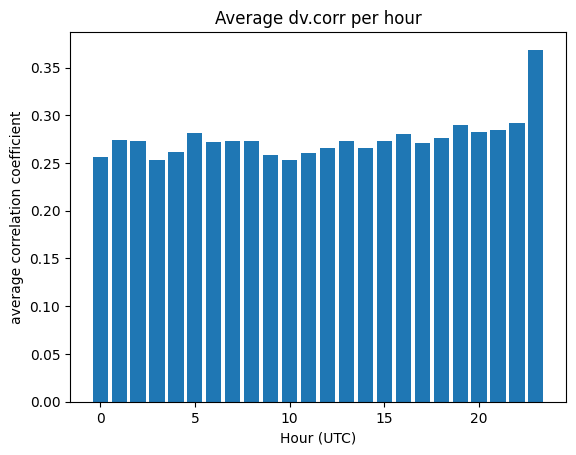

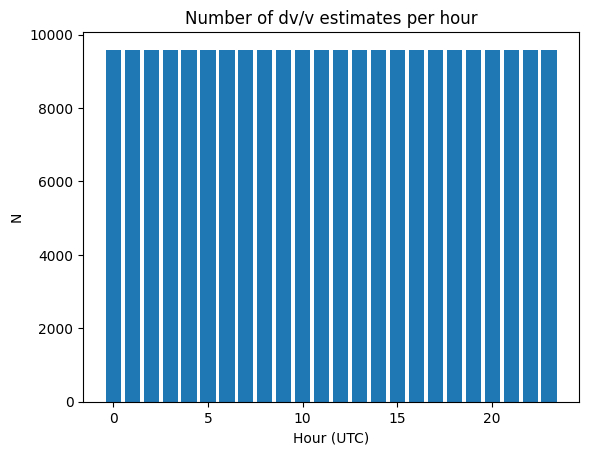

In [49]:
# Compute average dv.corr for each hour

dv_corr_hour = np.zeros(24)
dv_corr_hour_count = np.zeros(24)

corr_start_hour = np.array([cs.hour for cs in corr_starts])

for i in range(24):
    dv_corr_hour[i] = np.nanmean(dv.corr[np.where(corr_start_hour == i)])
    dv_corr_hour_count[i] = len(np.where(corr_start_hour == i)[0])

plt.figure()
plt.bar(np.arange(24), dv_corr_hour)
plt.title('Average dv.corr per hour')
plt.xlabel('Hour (UTC)')
plt.ylabel('average correlation coefficient')

plt.figure()
plt.bar(np.arange(24), dv_corr_hour_count)
plt.title('Number of dv/v estimates per hour')
plt.xlabel('Hour (UTC)')
plt.ylabel('N')


In [67]:
UTCDateTime(2016,1,1,8,10,2.3).time()

from datetime import time
time(5)>time(4, 3, 2)

TypeError: 'datetime.time' object is not callable

In [16]:
from seismic.correlate.stream import CorrStream, CorrTrace, CorrStats
from obspy import UTCDateTime
import numpy as np

cst = CorrStream()
for ii in range(24):
    corr_start = UTCDateTime(2016,1,1,ii,0,0)
    if ii == 23:
        corr_end = UTCDateTime(2016,1,2,0,0,0)
    else:
        corr_end = UTCDateTime(2016,1,1, ii+1, 0, 0)
    cstats = CorrStats({'start_lag': -5, 'end_lag': 5, 'corr_start': corr_start, 'corr_end': corr_end})
    ctr = CorrTrace(np.random.rand(3600), corr_start, corr_end, _header=cstats)
    cst.append(ctr)
print(cst)


24 Correlation(s) in Stream:

... | 2016-01-01T00:00:00.000000Z - 2016-01-01T01:00:00.000000Z | 1.0 Hz, 3600 samples
...
(22 other correlations)
...
... | 2016-01-01T23:00:00.000000Z - 2016-01-02T00:00:00.000000Z | 1.0 Hz, 3600 samples

[Use "print(Stream.__str__(extended=True))" to print all correlaitons]


In [1]:
from seismic.correlate.stream import CorrBulk
import numpy as np

cb = CorrBulk(np.zeros((5,5)))

cb[2]

IndexError: index 2 is out of bounds for axis 0 with size 0